In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import scipy.io
opts = {"with_labels": True, "node_color":'grey'}

In [2]:
#Matriz de acoplamiento

def matriz_acoplaminento(G):
    ma = np.zeros([len(G),len(G)])
    for nodo in G:
        for i in range(0,len(G)):
            if nodo != i:
                if G.has_edge(nodo,i):
                    ma[nodo,i] = 1
                else:
                    ma[nodo,i] = 0
            else:
                ma[nodo,i] = -(nx.degree(G,nodo))
                #ma[nodo,i] = -1
    return ma 
   

[[-9.  1.  1.  1.  1.  0.  1.  1.  0.  0.  0.  0.  1.  0.  1.  1.]
 [ 1. -8.  1.  1.  0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  0.  1.]
 [ 1.  1. -7.  1.  1.  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.]
 [ 1.  1.  1. -8.  1.  1.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.]
 [ 1.  0.  1.  1. -7.  1.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1. -7.  1.  1.  0.  0.  0.  1.  1.  0.  1.  0.]
 [ 1.  1.  0.  0.  1.  1. -8.  1.  1.  0.  1.  1.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  1.  1.  1. -8.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  1.  0.  0.  1.  1. -7.  1.  1.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.  1. -8.  1.  1.  0.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  1.  1. -7.  1.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  1.  0.  0.  1.  1. -7.  1.  1.  1.  0.]
 [ 1.  1.  1.  0.  0.  1.  0.  0.  0.  0.  1.  1. -8.  1.  1.  0.]
 [ 0.  1.  0.  1.  0.  0.  0.  0.  1.  1.  1.  1.  1. -9.  1.  1.]
 [ 1.  0.  0.  1.  0.  1.  0.  0.  0.  1.  0.  1.  1.  1. -8. 

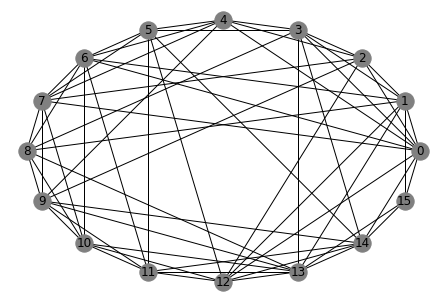

Los valores propios son:
[-4.440892098500626e-16, -3.440605088468959, -4.765545294372036, -5.405174670939373, -6.105192518701377, -6.588954762153087, -6.972271739593032, -8.050434317694233, -8.38783098574648, -8.633577787337895, -9.092761004563217, -9.711124630838924, -9.902115794598815, -10.555998153573844, -10.924022925721896, -11.464390325696897]
El valor propio Lamda2 es:
-3.440605088468959
El valor propio LamdaN es:
-11.464390325696897
El valor del eingratio de la red es:
3.3320854997626177


In [3]:
n, k = 16, 2
p = 0.9
G = nx.newman_watts_strogatz_graph(n,2*k,p)
clustering = nx.algorithms.average_clustering(G)
shorestPath = nx.average_shortest_path_length(G)
ma = matriz_acoplaminento(G)
#ma = -nx.laplacian_matrix(G).toarray()
scipy.io.savemat('c:/Users/Administrador/Documents/1MyStuffs/Master_FIME/TESIS/codigos/osciladores-Matlab/MatAcop.mat', mdict={'arr': ma})
print(ma)
print("El coeficiente de agrupamiento es:",clustering)
print("El promedio del camino mas corto es:",shorestPath)

nx.draw_circular(G,**opts)
plt.show()


#Calculo de los valores propios de la matriz de acoplamiento
vp = np.linalg.eigvals(ma)
vp = sorted(vp,reverse=True)
print("Los valores propios son:")
print(vp)
print("El valor propio Lamda2 es:")
print(vp[1])

print("El valor propio LamdaN es:")
print(vp[n-1])

#Calculo del metodo eingratio para sincronizabilidad
eingratio = vp[n-1]/vp[1]
print("El valor del eingratio de la red es:")
print(eingratio)